In [ ]:
- title: Занятие 6
- author: Kononov Dmitry
- date: 2022-11-14
- category: python
- test_link: http://olymp3.vdi.mipt.ru/cgi-bin/new-client?contest_id=10103&locale_id=1
- test_comment: Задание №3
- tags: lab 6
- slug: lab6
- ipynb_url: download/lab6.ipynb

# Практическое занятие 6: сортировки и двоичный поиск 
## Цель: Получить практический навык реализации популярных алгоритмов сортировки и двоичного поиска на языке **Python**
## Задачи:
1. Сортировка "пузырьком"
2. Сортировка выбором
3. Сортировка подсчетом
4. Сортировка кучей
5. Двоичный поиск в массиве

## Сортировка пузырьком
Метод **сортировки пузырьком** обеспечивает сортировку массива по возрастанию путем перемещения (*"всплытия"*) больших элементов в конец массива (в элементы с большими индексами).

Рассмотрим **сортировку пузырьком** на примере. Пусть задан массив 
``` python 
A = [5, 3, 1, 9, 7, 0]
```
На **шаге 1** алгоритма происходит сравнение первой пары элементов `5` и `3` — так как `5` > `3` (`A[0]` > `A[1]`), меняем их местами в массиве (`A[0], A[1] = A[1], A[0]`), получаем новый массив:
``` python 
A = [3, 5, 1, 9, 7, 0]
```
На **шаге 2** алгоритма происходит сравнение следующей пары элементов `5` и `1` — так как `5` > `1` (`A[1]` > `A[2]`), меняем их местами в массиве (`A[1], A[2] = A[2], A[1]`), получаем новый массив:
``` python 
A = [3, 1, 5, 9, 7, 0]
```
На **шаге 3** алгоритма происходит сравнение следующей пары элементов `5` и `9` — так как не выполняется условие `5` > `9` (`A[2]` > `A[3]`), не выполняем никаких действий с массивом (элементы располоены в "правильном" порядке). Массив не меняется:
``` python 
A = [3, 1, 5, 9, 7, 0]
```
На **шаге 4** алгоритма происходит сравнение следующей пары элементов `9` и `7` — так как `9` > `7` (`A[3]` > `A[4]`), меняем их местами в массиве (`A[3], A[4] = A[4], A[3]`), получаем новый массив:
``` python 
A = [3, 1, 5, 7, 9, 0]
```
На **шаге 5** алгоритма происходит сравнение следующей пары элементов `9` и `0` — так как `9` > `0` (`A[4]` > `A[5]`), меняем их местами в массиве (`A[4], A[5] = A[5], A[4]`), получаем новый массив:
``` python 
A = [3, 1, 5, 7, 0, 9]
```
Видим, что наибольший элемент массива переместился в его конец: "всплыл" подобно "пузырьку". При этом, мы "пробежались" по индексам от 0 (шаг 1) до `len(A)` - 1. Теперь нам надо повторить шаги, начиная с первого и до `len(A)` - 2.

После того, как на вершине (в предпоследнем элементе) окажется значение `7`, надо повторить шаги, начиная с первого и до `len(A)` - 3 и т.д. пока мы не переберем все элементы.

Код функции, реализующий рассмотренный алгоритм, будет иметь следующий вид:

In [ ]:
def bubble_sort(A):
    for i in range(len(A) - 1):
        for j in range(len(A) - 1 - i):
            if A[j] > A[j + 1]:
                A[j], A[j + 1] = A[j + 1], A[j]

Выполните функцию `bubble_sort()` для массива `A` из примера выше и убедитесь, что сортировка происходит верно.

### Асимптотическая сложность сортировки "пузырьком"
Анализируя код функции `bubble_sort()` видим, что программа проходит по массиву в общем случае порядка `len(A) * len(A)` раз. Другими словами, асимптотическая сложность алгоритма равна $O(n^2)$, где n — размер массива. 

## Сортировка выбором
При сортировке выбором мы разделяем исходный массив на две части: несортированную и уже отсортированную. Далее поступаем следующим образом.
1. На **шаге 1** алгоритма находим номер минимального значения в неотсортированной части массива.
2. На **шаге 2** алгоритма производим обмен значения, найденного на шаге 1, со значением первой неотсортированной позиции.
3. Переходим к шагу 1 и продолжаем сортировку оставшегося списка, исключив из рассмотрения элемент, в который мы разместили минимальное значение в шаге 2.

Алгоритм выполняется n-1 раз, где n — размер массива.

Свое название алгоритм получил, так как какждый раз выбирается минимальный аргумент.

Код функции, реализующий рассмотренный алгоритм, будет иметь следующий вид:

In [ ]:
def selection_sort(A): 
    for i in range(0, len(A) - 1): 
        # Поиск минимума и сохранение его индекс в переменной i_min 
        i_min = i 
        for j in range(i + 1, len(A)): 
            if A[j] < A[i_min]: 
                i_min = j 
        # Меняем A[i_min] и A[i] местами 
        A[i], A[i_min] = A[i_min], A[i]

Выполните функцию `selection_sort()` для массива `A = [3, 1, 5, 7, 0, 9]` и убедитесь, что сортировка происходит верно.

### Асимптотическая сложность сортировки выбором
Как видно из кода функции `selection_sort()`, асимптотическая сложность алгоритма равна $O(n^2)$, где n — размер массива. 

## Сортировка подсчетом
Рассмотрим сортировку массива чисел, которые могут принимать значения из небольшого диапазона возможных значений, но при этом их настолько велико, что алгоритмы сортировки сложности $O(n^2)$ не подходят. 

Пусть исходная последовательность чисел длины n, хранится в массиве `A`. Используем дополнительно вспомогательный массив `count` с индексами от 0 до `max(A)` + 1 изначально заполненный нулями. Для сортировки массива `A` воспользуемся следующим алгоритмом.
1. На **шаге 1** алгоритма сортировки последовательно пройдём по массиву `A` и запишем в `count[i]` количество чисел, равных i.
2. На **шаге 2** последовательно пройдём по массиву `count` и для каждого числа *i* из диапазона допустимых значений последовательно запишем в массив `А` число *i* `count[i]` раз.

Код функции, реализующий рассмотренный алгоритм для сортировки массива натуральных чисел, будет иметь следующий вид:

In [ ]:
def counting_sort(A):
    # Инициируем массив счетчиков значений нулями
    count = [0] * (max(A)  + 1)
    
    # Проходим по массиву с одновременным подсчетом числа значений
    for i in range(len(A)):
        count[A[i]] += 1

    # Очистим исходный несортированный массив
    A[:] = []
    
    # Заполним соритированный массив с учетом подсчитанных значений
    for i in range(len(count)):
        A += [i] * count[i]

Выполните функцию `counting_sort()` для массива `A = [5, 0, 4, 2, 2, 3, 5, 1, 6, 1, 3]` и убедитесь, что сортировка происходит верно.

### Асимптотическая сложность сортировки подсчетом
Как видно из кода функции `counting_sort()`, асимптотическая сложность алгоритма равна $O(n)$, где n — размер массива. 

## Сортировка кучей
### Куча (heap)
Вначале рассмотрим, что такое куча. Для структуры данных "куча" (heap) поддерживаются следующие операции:
1. Добавить элемент в структуру данных.
2. Извлечь из структуры данных наибольший (вариант - наименьший) элемент. Извлеченный элемент удаляется из структуры.
В куче элементы хранятся в виде двоичного дерева, то есть у элементов есть два потомка - левый и правый. В вершине кучи находится один элемент, у него - два потомка на следующем уровне, у них, в свою очередь, по два потомка на третьем уровне и т. д. Уровни заполняются в порядке увеличения номера уровня, а сам уровень заполняется слева направо. У элементов последнего уровня нет ни одного потомка, возможно, что и у некоторых элементов предпоследнего уровня нет потомков. Также в куче может быть один элемент, у которого только один потомок (левый).

При этом для элементов кучи верно следующее свойство - каждый из элементов кучи большее или равен всех своих потомков. В частности это означает, что в вершине кучи хранится наибольший элемент.

На картинке приведен пример правильной кучи из 6 элементов:
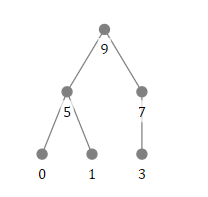

Удобно элементы кучи хранить в списке, начиная с корневого элемента. Для простоты нумерации пропустим нулевой элемент списка, то есть вершина кучи будет храниться в элементе списка с индексом 1. Остальные элементы кучи хранятся подряд в элементах списка с индексами 2, 3, 4 и т. д. То есть для примера выше:
``` python
heap[1] = 9
heap[2] = 5
heap[3] = 7
heap[4] = 0
heap[5] = 1
heap[6] = 3
```
У элемента `heap[i]` левым потомком является элемент `heap[2*i]`, а правым потомком - элемент `heap[2*i+1]`. А родителем элемента `heap[i]` является элемент `heap[i//2]`.

#### Добавление элемента в кучу
Элемент добавляется в кучу следующим образом. Сначала он добавляется в самый конец кучи, то есть становится последним элементов (это можно сделать при помощи метода `append()` списка). При этом возможно нарушение главного свойства кучи (каждый элемент больше своих потомков). Свойство могло нарушиться для элемента, который является родителем добавляемого. В этом случае нужно поменять элемент с его родителем. Процесс нужно повторять до тех пор, пока условие нарушается, то есть у добавленного элемента есть родитель (то есть элемент не корневой) и этот родитель меньше добавляемого. То есть добавляемый элемент «поднимается» вверх к вершине кучи, пока не займет надлежащее место.

In [ ]:
def heap_add(heap, el):
    heap.append(el)
    i = len(heap) - 1
    while i > 1 and heap[i // 2] < el:
        heap[i] = heap[i // 2]
        i //= 2
        heap[i] = el

В функцию `heap_add()` передается два параметра — список, в котором хранится куча (heap) и добавляемый элемент (el). Сначала в конец кучи добавляется новый элемент, переменной *i* присваивается индекс добавленного элемента. Затем все предки добавленного элемента должны сдвинуться вниз, если они были меньше добавленного элемента. Это реализовано в цикле while. После окончания цикла на место элемента *i* записывается значение el.

#### Удаление элемента из кучи
Из кучи можно удалить наибольший элемент, то есть тот, который хранится в вершине куче. На его место нужно поставить какой-нибудь элемент кучи. Поставим последний элемент кучи, удалив его из конца. Теперь в вершине кучи может нарушиться свойство кучи, значит, верхний элемент нужно сместить вниз, обменяв его с одним из своих потомков. При этом из двух потомков нужно выбрать наибольший и если этот наибольший потомок больше стоящего в вершине кучи, обменяем их местами.

Тем самым элемент, который был взят снизу кучи, спустится на один уровень вниз. Будем дальше опускать этот элемент до тех пор, пока оба его потомка не станут меньше его (или у него не будет потомков, также необходимо аккуратно обработать случай одного потомка.

In [ ]:
def heap_pop(heap):
    if len(heap) == 2:
        return heap.pop()
    heap_root = heap[1]
    heap[1] = heap.pop()
    i = 1
    while 2 * i + 1 < len(heap) and heap[i] < max(heap[2 * i], heap[2 * i + 1]):
        if heap[2 * i] > heap[2 * i + 1]:
            heap[i], heap[2 * i] = heap[2 * i], heap[i]
            i = 2 * i
        else:
            heap[i], heap[2 * i + 1] = heap[2 * i + 1], heap[i]
            i = 2 * i + 1
    if 2 * i == len(heap) - 1 and heap[i] < heap[2 * i]:
        heap[i], heap[2 * i] = heap[2 * i], heap[i]
    return heap_root

В функции `heap_pop()` сохраняется значение на вершине кучи в переменной heap_root, затем последний элемент удаляется из кучи и ставится на вершину кучи. Отдельно обрабатывается случай, когда куча состояла ровно из одного элемента, т. е. после удаления она становится пустой. Далее в основном цикле элемент опускается вниз. Цикл продолжается пока у элемента два потомка и хотя бы один из потомков больше текущего элемента. В этом случае элемент меняется местами с наибольшим из потомков и цикл повторяется заново.

После окончания цикла отдельно обрабатывается случай, когда у элемента ровно один потомок (нет правого потомка) и единственный левый потомок больше данного элемента, в этом случае необходимо провести еще один обмен.

### Сортировка кучей
В данной сортировке из элементов списка сначала строится куча, потом элементы по одному удаляются из кучи — сначала наибольший элемент, потом - наибольший из оставшихся и т.д.
Код функции, реализующий рассмотренный алгоритм для сортировки массива, будет иметь следующий вид:

In [ ]:
def heap_sort(A):  
    heap = [] 
    # Добавим нулевой элемент в кучу
    heap.append(0)
    
    # Сформируем кучу
    for el in A:
        heap_add(heap, el)  
    
    # Заполним массив в отсортированном порядке
    i = 1
    while len(heap) > 1:
        A[-i] = heap_pop(heap)  
        i += 1

Выполните функцию `heap_sort()` для массива `A = [3, 1, 5, 7, 0, 9]` и убедитесь, что сортировка происходит верно.

### Асимптотическая сложность сортировки кучей
Асимптотическая сложность алгоритма сортировки кучей равна $O(n*log_2(n))$, где n — размер массива. 

## Двоичный поиск в массиве
Алгоритмы линейного поиска должны просмотреть весь массив в поисках данного элемента, поэтому сложность работы таких алгоритмов будет $O(n)$ (где n — размер массива).

Но если исходный массив уже отсортирован, то элемент в нем можно найти гораздо быстрее, если воспользоваться идеей двоичного (бинарного) поиска. Идея заключается в делении массива пополам, после чего в зависимости от значения медианного элемента в массиве мы переходим либо к левой, либо к правой половине массива. Тем самым, длина части, в которой мы ищем элемент, сокращается в два раза на каждом шаге цикла, а, значит, общая сложность алгоритма двоичного поиска будет $O(log_2(N))$.

Итак, стоит задача — выяснить, содержится ли элемент *key* в массиве `A`, или в его части. Будем сокращать часть массива, в которой мы ищем элемент *key*. А именно, введем две границы — **left** и **right**. При этом мы будем знать, что элемент `A[right]` строго больше, чем *key*, то же самое можно сказать и про элементы, которые правее **right**. Про элемент `A[left]` и те, которые находятся левее него мы будем знать, что все они меньше или равны *key*. А вот про элементы, которые лежат строго между `A[left]` и `A[right]` (то есть про элементы, чьи индексы больше **left**, но меньше **right**), мы ничего не знаем.

В самом начале мы ничего не знаем про все элементы массива, поэтому присвоим **left** = -1 и **right** = `len(A)`. Можно представить это так — к концам массива добавляются два фиктивных элемента, в левый конец добавляется элемент, в который записывается минус бесконечность (т. е. значение, заведомо меньшее, чем *key*), и этот элемент имеет индекс -1, а в правый элемент дописывается элемент, равный плюс бесконечности, и его индекс равен len(A). Соответственно, переменные **left** и **right** первоначально указывают на эти фиктивные элементы (то есть на самом деле никаких элементов к массиву добавлять не требуется, мы это делаем лишь мысленно).

Затем разделим отрезок от **left** до **right** на две части и возьмем средний элемент между ними. Его индекс равен `middle = (left + right) // 2`. Сравним значение этого элемента со значением *key*. Если `A[middle]` строго больше чем *key* это означает, что сам элемент `A[middle]` и все, что правее него, должно попасть в правую часть. Это означает, что нужно сделать присваивание `right = middle`. Иначе (если `A[middle] <= key`), то элемент `A[middle]` и все, что левее него, должно попасть в левую часть, то есть необходимо присвоить `left = middle`.

Будем повторять этот процесс, пока между двумя границами **left** и **right** еще есть элементы, то есть пока `right > left + 1`.

Получаем следующий алгоритм:
```python
left = -1 
right = len(A) 
while right > left + 1: 
    middle = (left + right) // 2 
    if A[middle] > key: 
        right = middle 
    else: 
        left = middle
```
Что будет после завершения этого алгоритма? Границы **left** и **right** указывают на два соседних элемента, при этом `A[right] > key`, `A[left] <= key`. Таким образом, если элемент *key* содержится в списке, то `A[left] == key`. Правда, возможна ситуация, когда `left == -1` (если в списке `A` все элементы строго больше *key*), поэтому для ответа на вопрос «содержится ли в списке A элемент key» необходимо проверить условие:
```python
if left >= 0 and A[left] == key:
    return left
else:
    return -1
```
Получим следующую функцию двоичного поиска в отсортированном массиве:

In [ ]:
def binary_search_right(A, key):
    left = -1 
    right = len(A) 
    while right > left + 1: 
        middle = (left + right) // 2 
        if A[middle] > key: 
            right = middle 
        else: 
            left = middle
    if left >= 0 and A[left] == key:
        return left
    else:
        return -1

Выполните функцию `binary_search_right()` для поиска элемента со значением `5` в массиве `A = [5, 3, 1, 9, 5, 7, 0]`. Для сортировки массива используйте любой из рассмотренных ранее алгоритмов.

Из результата мы видим, что алгоритм ищет самый правый из равных *key* элементов. Ниже приведен код функции, которая ищет самый левый  из равных *key* элементов.

In [ ]:
def binary_search_left(A, key):
    left = -1 
    right = len(A) 
    while right > left + 1: 
        middle = (left + right) // 2 
        if A[middle] >= key: 
            right = middle 
        else: 
            left = middle
    if right < len(A) and A[right] == key:
        return right
    else:
        return -1

Выполните функцию `binary_search_left()` для поиска элемента со значением `5` в массиве `A = [5, 3, 1, 9, 5, 7, 0]`. Для сортировки массива используйте любой из рассмотренных ранее алгоритмов.